If a dataset is present, features and calculated statistics relevant to the problem
have been reported and discussed, along with a sampling of the data.
In lieu of a dataset, a thorough description of the input space or input data has been made. 
Abnormalities or characteristics of the data or input that need to be addressed have been identified.
A visualization has been provided that summarizes or extracts a relevant characteristic or feature
about the dataset or input data with thorough discussion. Visual cues are clearly defined.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
# select 2014-2020
vix_raw = pd.read_csv("VIX_History.csv", index_col = 0)
vix_raw.index = pd.to_datetime(vix_raw.index)
# we want to predict close price
vix_raw = vix_raw[(vix_raw.index.year > 2004) & (vix_raw.index.year < 2020)]['CLOSE']
vix_log = np.log(vix_raw)
# since VIX is an index calculated by CBOE, 
# this csv (from CBOE) contains all values of VIX and there is no need to backfill

# no nulls
print(vix_raw.isnull().sum())

0


Text(0.5, 1.0, 'Histogram of Raw VIX Prices')

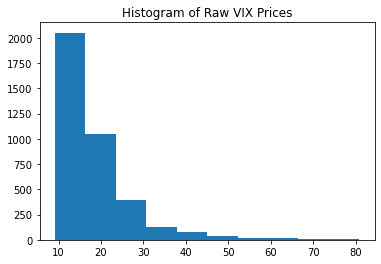

In [6]:
# confirm that raw VIX is heavily skewed to the right -  tail on the right
plt.hist(vix_raw)
plt.title('Histogram of Raw VIX Prices')

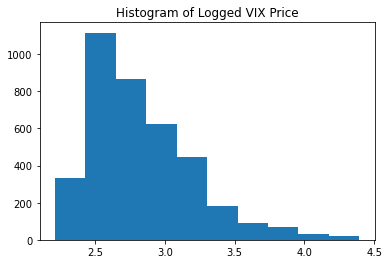

In [8]:
# confirm that log VIX is normally distributed
plt.hist(vix_log)
plt.title('Histogram of Logged VIX Price')
plt.show()

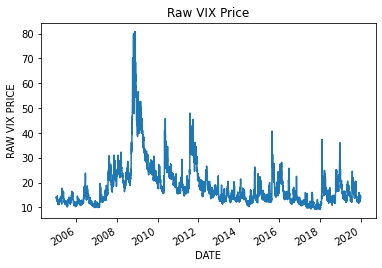

In [9]:
# contrast with raw VIX
vix_raw.plot()
plt.ylabel('RAW VIX PRICE')
plt.title('Raw VIX Price')
plt.show()

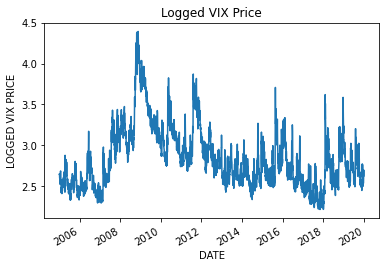

In [10]:
# confirm log VIX is a stationary time series (plot and look for trend and seasonality)
vix_log.plot()
plt.ylabel('LOGGED VIX PRICE')
plt.title('Logged VIX Price')
plt.show()

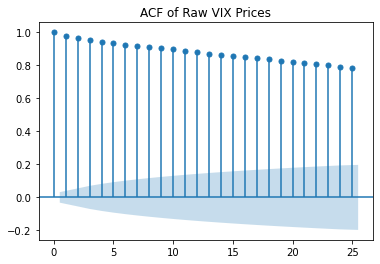

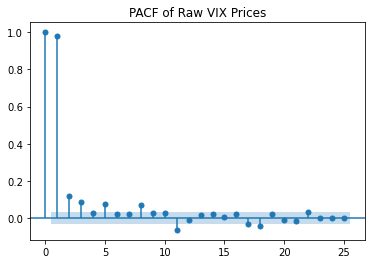

In [11]:
# plot ACF and PACF to offer backing for autoregressiveness
plot_acf(vix_raw, lags=25)
plt.title('ACF of Raw VIX Prices')
plot_pacf(vix_raw, lags=25)
plt.title('PACF of Raw VIX Prices')

plt.show()

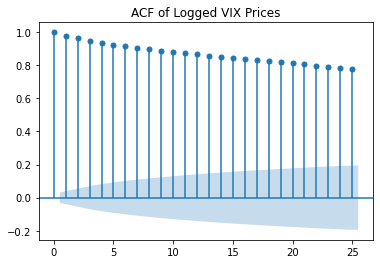

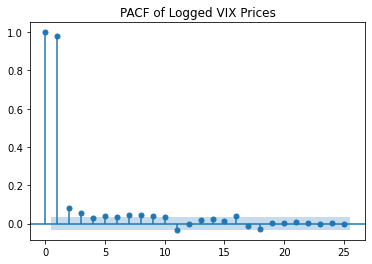

In [12]:
# plot ACF and PACF to offer backing for autoregressiveness
plot_acf(vix_log, lags=25)
plt.title('ACF of Logged VIX Prices')

plot_pacf(vix_log, lags=25)
plt.title('PACF of Logged VIX Prices')

plt.show()

In [15]:
# split into train and test

# for HAR, need daily, weekly, monthly averages
vix_har = pd.DataFrame()
vix_har['CLOSE'] = vix_log
vix_har['DAILY'] = vix_log.shift(1)
vix_har['WEEKLY'] = vix_log.rolling(5).mean()
vix_har['MONTHLY'] = vix_log.rolling(16).mean()

vix_har.dropna(inplace=True)

train_har = vix_har[vix_har.index.year <= 2017]
test_har = vix_har[vix_har.index.year > 2017]
print(train_har)
print(test_har)

               CLOSE     DAILY    WEEKLY   MONTHLY
DATE                                              
2005-01-25  2.643334  2.684440  2.639552  2.601539
2005-01-26  2.598235  2.643334  2.643459  2.598631
2005-01-27  2.583243  2.598235  2.634740  2.595232
2005-01-28  2.583243  2.583243  2.618499  2.591343
2005-01-31  2.551006  2.583243  2.591812  2.587744
...              ...       ...       ...       ...
2017-12-22  2.292535  2.263844  2.278118  2.320785
2017-12-26  2.327278  2.292535  2.292685  2.313974
2017-12-27  2.348514  2.327278  2.301271  2.307139
2017-12-28  2.320425  2.348514  2.310519  2.300450
2017-12-29  2.401525  2.320425  2.338055  2.300563

[3256 rows x 4 columns]
               CLOSE     DAILY    WEEKLY   MONTHLY
DATE                                              
2018-01-02  2.279316  2.401525  2.335412  2.298117
2018-01-03  2.213754  2.279316  2.312707  2.295246
2018-01-04  2.221375  2.213754  2.287279  2.294438
2018-01-05  2.221375  2.221375  2.267469  2.289865
2018-0

In [10]:
# for LSTM: past 16 days of data
vix_lstm = pd.DataFrame()
vix_lstm['CLOSE'] = vix_raw/100 # normalize so the numbers are small

for i in range(1, 17):
    vix_lstm[f'{i}_DAYS_AGO'] = vix_lstm['CLOSE'].shift(i)
vix_lstm.dropna(inplace=True)
train_lstm = vix_lstm[vix_lstm.index.year <= 2017]
test_lstm = vix_lstm[vix_lstm.index.year > 2017]
print(train_lstm)
print(test_lstm)

             CLOSE  1_DAYS_AGO  2_DAYS_AGO  3_DAYS_AGO  4_DAYS_AGO  \
DATE                                                                 
2005-01-26  0.1344      0.1406      0.1465      0.1436      0.1383   
2005-01-27  0.1324      0.1344      0.1406      0.1465      0.1436   
2005-01-28  0.1324      0.1324      0.1344      0.1406      0.1465   
2005-01-31  0.1282      0.1324      0.1324      0.1344      0.1406   
2005-02-01  0.1203      0.1282      0.1324      0.1324      0.1344   
...            ...         ...         ...         ...         ...   
2017-12-22  0.0990      0.0962      0.0972      0.1003      0.0953   
2017-12-26  0.1025      0.0990      0.0962      0.0972      0.1003   
2017-12-27  0.1047      0.1025      0.0990      0.0962      0.0972   
2017-12-28  0.1018      0.1047      0.1025      0.0990      0.0962   
2017-12-29  0.1104      0.1018      0.1047      0.1025      0.0990   

            5_DAYS_AGO  6_DAYS_AGO  7_DAYS_AGO  8_DAYS_AGO  9_DAYS_AGO  \
DATE           

In [16]:
# save csvs
train_har.to_csv('train_har.csv')
test_har.to_csv('test_har.csv')

In [12]:
train_lstm.to_csv('train_lstm.csv', header=False, index=False)
test_lstm.to_csv('test_lstm.csv', header=False, index=False)